<a href="https://colab.research.google.com/github/joannestephany/ProjetoPy/blob/master/PAA_Backtracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Digite o número de lojas (n): 3

Posições geradas:
Estacionamento: (0, 0)
Loja 1: (-4, -10)
Loja 2: (9, 10)
Loja 3: (-3, 7)

Melhor caminho (0 = estacionamento, 1-3 = lojas): [0, 1, 3, 2, 0]
Custo total (distância): 53.62


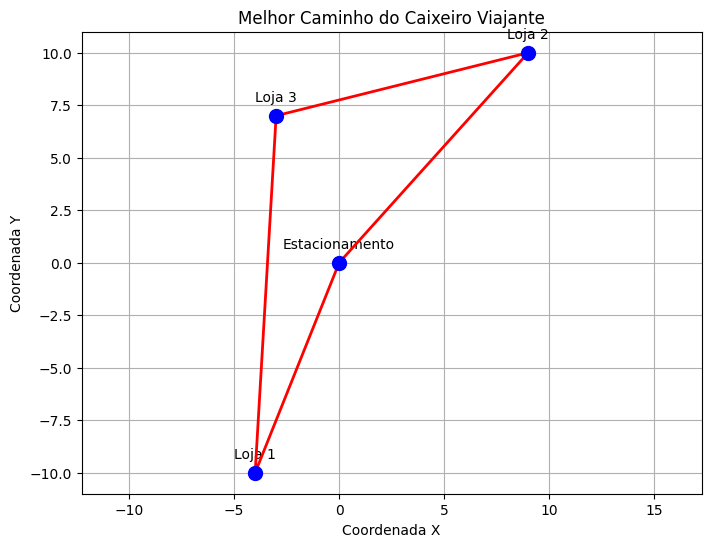

In [ ]:
import math
import random
import matplotlib.pyplot as plt

def distance(p1, p2):
    """Calcula a distância euclidiana entre dois pontos."""
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

# Entrada do número de lojas
n = int(input("Digite o número de lojas (n): "))

# Posição do estacionamento (ponto inicial e final)
parking = (0, 0)

# Gera posições aleatórias para as lojas (coordenadas entre -10 e 10 para simplicidade)
stores = [(random.randint(-10, 10), random.randint(-10, 10)) for _ in range(n)]

# Matriz de distâncias: 0 é o estacionamento, 1 a n são as lojas
dist = [[0] * (n + 1) for _ in range(n + 1)]
for i in range(n):
    dist[0][i + 1] = distance(parking, stores[i])
    dist[i + 1][0] = dist[0][i + 1]  # Distância de volta ao estacionamento
    for j in range(n):
        dist[i + 1][j + 1] = distance(stores[i], stores[j])

# Variáveis globais para armazenar o melhor caminho e custo
best_path = None
best_cost = float('inf')

def backtrack(path, visited, current_cost):
    """Função de backtracking para explorar todos os caminhos possíveis."""
    global best_path, best_cost

    # Caso base: visitou todas as lojas, calcula o custo de volta ao estacionamento
    if len(path) == n:
        total_cost = current_cost + dist[path[-1]][0]  # Volta ao estacionamento
        if total_cost < best_cost:
            best_cost = total_cost
            best_path = path[:]
        return

    # Tenta adicionar cada loja não visitada ao caminho
    for i in range(1, n + 1):
        if i not in visited:
            # Custo para ir da última posição à nova loja
            new_cost = current_cost + (dist[path[-1]][i] if path else dist[0][i])
            path.append(i)
            visited.add(i)
            backtrack(path, visited, new_cost)
            # Backtrack: remove a loja para tentar outras opções
            path.pop()
            visited.remove(i)

# Chamada inicial do backtracking (começa vazio, sem visitas, custo 0)
backtrack([], set(), 0)

# Saída do resultado
print("\nPosições geradas:")
print(f"Estacionamento: {parking}")
for i in range(n):
    print(f"Loja {i+1}: {stores[i]}")

print(f"\nMelhor caminho (0 = estacionamento, 1-{n} = lojas): {[0] + best_path + [0]}")
print(f"Custo total (distância): {best_cost:.2f}")

# Geração do gráfico
plt.figure(figsize=(8, 6))

# Coordenadas de todos os pontos (estacionamento + lojas)
all_points = [parking] + stores
x_coords = [p[0] for p in all_points]
y_coords = [p[1] for p in all_points]

# Plota os pontos
plt.scatter(x_coords, y_coords, color='blue', s=100, zorder=5)

# Anotações para identificar pontos
plt.annotate("Estacionamento", (parking[0], parking[1]), textcoords="offset points", xytext=(0,10), ha='center')
for i in range(n):
    plt.annotate(f"Loja {i+1}", (stores[i][0], stores[i][1]), textcoords="offset points", xytext=(0,10), ha='center')

# Desenha o caminho percorrido
if best_path:
    # Ordem do caminho: estacionamento -> lojas na ordem -> estacionamento
    path_indices = [0] + best_path + [0]  # 0 para estacionamento
    path_x = [all_points[idx][0] for idx in path_indices]
    path_y = [all_points[idx][1] for idx in path_indices]

    # Plota as linhas do caminho
    plt.plot(path_x, path_y, color='red', linewidth=2, marker='o', markersize=8, zorder=4)

# Configurações do gráfico
plt.title("Melhor Caminho do Caixeiro Viajante")
plt.xlabel("Coordenada X")
plt.ylabel("Coordenada Y")
plt.grid(True)
plt.axis('equal')  # Mantém proporções iguais
plt.show()
